## EntreFEST 2019 Machine Learning: Zero to Up and Running

### Define Problem
Can we predict the presence of heart disease from patient health information?

### Gather Data
In this step we will download the [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) available from the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php). The UC Irvine Machine Learning Repository hosts many data sets that can serve as a starting point for a variety of Machine Learning projects.

In [1]:
import os
import requests
from bs4 import BeautifulSoup

base_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/'
local_dir = 'data/uci-ml-heart-disease/'
local_path = os.path.dirname(local_dir) 
if not os.path.exists(local_path):
    os.makedirs(local_path)

r = requests.get(base_url)
soup = BeautifulSoup(r.text)
for link in soup.find_all('a'):
    href = link.get('href')
    # Ignore referneces to the parent directory or the 'costs' subdirectory
    if href != '/ml/machine-learning-databases/' and href != 'costs/':
        download_url = base_url + href
        local_file = local_dir + href
        print(download_url)
        with open(local_file, 'wb') as f:
            f.write(requests.get(download_url).content)

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/Index
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/WARNING
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/ask-detrano
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/bak
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/hungarian.data
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/long-beach-va.data
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/new.data
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-d

### Explore and Clean Data
In this step we will load, explore, and clean a subset of the heart disease data. We will focus on 14 key variables from data collected at the Cleveland Clinic Foundation contained in the `processed.cleveland.data` file.
* age: age in years
* sex: sex (0 = female; 1 = male)
* cp: chest pain type 
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
* restecg: resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
  - Value 1: upsloping
  - Value 2: flat
  - Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* num: the predicted attribute.
  - heart-disease.names also refers to this as 'goal'. Going forward this notebook will refer to this attribute as 'target'.
  - It indicates the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# The file contains no column names, so we specify them here. The names were obtained from 
# the information in the heart-disease.names file included in the data set.
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
             'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
orig_df = pd.read_csv('data/uci-ml-heart-disease/processed.cleveland.data', header=None, names=col_names)

In [3]:
# From here forward we will use df for exploration, transformation, etc. I keep orig_df for reference if needed.
df = orig_df
# Peek at a few rows of data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Check the inferred data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
target      303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [5]:
# Why were 'ca' and 'thal' inferred as object?
print('Unique values for ca: %s' % df.ca.unique())
print('Unique values for thal: %s' % df.thal.unique())

# Count up question marks
print('Num with missing ca or thal: %s' % df.loc[(df.ca == '?') | (df.thal == '?')].ca.count())

Unique values for ca: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values for thal: ['6.0' '3.0' '7.0' '?']
Num with missing ca or thal: 6


In [6]:
# For this example, we'll just discard those 6 records with missing 'ca' or 'thal'
df = df.loc[(df.ca != '?') & (df.thal != '?')]
print('Num rows remaining: %s' % len(df))
# Now convert to float
df.ca=df.ca.astype('float64')
df.thal=df.thal.astype('float64')
df.info()

Num rows remaining: 297
<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null float64
sex         297 non-null float64
cp          297 non-null float64
trestbps    297 non-null float64
chol        297 non-null float64
fbs         297 non-null float64
restecg     297 non-null float64
thalach     297 non-null float64
exang       297 non-null float64
oldpeak     297 non-null float64
slope       297 non-null float64
ca          297 non-null float64
thal        297 non-null float64
target      297 non-null int64
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [7]:
# Map the target to 0 and 1 (absence or presence of heart disease)
# Notice that after this mapping the class distribution is reasonably balanced
print('Old value counts:')
print(df.groupby('target').size())
df.target=df.target.map(lambda x: 1 if x > 0 else 0)
print('\nNew value counts:')
print(df.groupby('target').size())

Old value counts:
target
0    160
1     54
2     35
3     35
4     13
dtype: int64

New value counts:
target
0    160
1    137
dtype: int64


In [8]:
# Get descriptive statistics for each column. We set the formatting so that it's easier to read.
# Notice that we have variables of different magnitudes, therefore our model may benefit from standardizing these variables. 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000,297.000,297.000,297.000,297.000,297.000,297.000,297.000,297.000,297.000,297.000,297.000,297.000,297.000
mean,54.542,0.677,3.158,131.694,247.350,0.145,0.997,149.599,0.327,1.056,1.603,0.677,4.731,0.461
std,9.050,0.468,0.965,17.763,51.998,0.352,0.995,22.942,0.470,1.166,0.618,0.939,1.939,0.499
min,29.000,0.000,1.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,1.000,0.000,3.000,0.000
25%,48.000,0.000,3.000,120.000,211.000,0.000,0.000,133.000,0.000,0.000,1.000,0.000,3.000,0.000
50%,56.000,1.000,3.000,130.000,243.000,0.000,1.000,153.000,0.000,0.800,2.000,0.000,3.000,0.000
75%,61.000,1.000,4.000,140.000,276.000,0.000,2.000,166.000,1.000,1.600,2.000,1.000,7.000,1.000
max,77.000,1.000,4.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,3.000,3.000,7.000,1.000


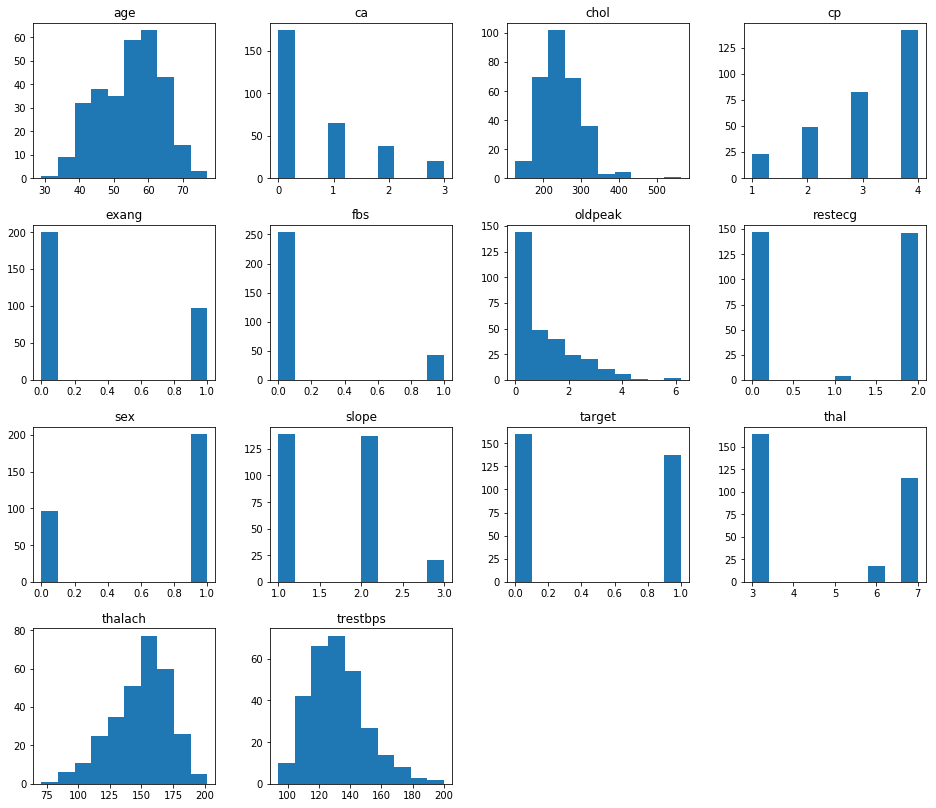

In [9]:
df.hist(grid=False, figsize=(16,14))
plt.show()

### Transform and Select Features

In [10]:
# Map the categorical variables to strings. While the mapping is not strictly necessary,
# it serves to highlight the rationale for one-hot-encoding later on.

df.sex=df.sex.map({
    0:'female',
    1:'male'
})

df.cp=df.cp.map({
    1:'typical_angina',
    2:'atypical_angina',
    3:'non_anginal_pain',
    4:'asymptomatic',
})

df.restecg=df.restecg.map({
    0:'ecg_normal',
    1:'wave_abnormality',
    2:'left_ventricular_hypertrophy',
})

df.slope=df.slope.map({
    1:'upsloping',
    2:'flat',
    3:'downsloping'
})

df.thal=df.thal.map({
    3:'thal_normal',
    6:'fixed_defect',
    7:'reversible_defect'
})

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.000,male,typical_angina,145.000,233.000,1.000,left_ventricular_hypertrophy,150.000,0.000,2.300,downsloping,0.000,fixed_defect,0
1,67.000,male,asymptomatic,160.000,286.000,0.000,left_ventricular_hypertrophy,108.000,1.000,1.500,flat,3.000,thal_normal,1
2,67.000,male,asymptomatic,120.000,229.000,0.000,left_ventricular_hypertrophy,129.000,1.000,2.600,flat,2.000,reversible_defect,1
3,37.000,male,non_anginal_pain,130.000,250.000,0.000,ecg_normal,187.000,0.000,3.500,downsloping,0.000,thal_normal,0
4,41.000,female,atypical_angina,130.000,204.000,0.000,left_ventricular_hypertrophy,172.000,0.000,1.400,upsloping,0.000,thal_normal,0


In [11]:
# Split apart our input variables and target
values = df.values
features = df.loc[:, df.columns != 'target']
y = df.target.values

In [12]:
# Setup preprocessing to perform scaling and one-hot-encoding
# For more on scaling: 
#     https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
# For more on one-hot-encoding: 
#     https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

preprocess = make_column_transformer(
    (StandardScaler(), ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']),
    (OneHotEncoder(), ['sex', 'cp', 'restecg', 'slope', 'thal']),
    remainder='passthrough'
)

X = preprocess.fit_transform(features)
# We have more columns now due to one-hot-encoding. Let's check out a sample row.
new_col_names=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
new_col_names=new_col_names+preprocess.transformers_[1][1].get_feature_names().tolist()+['fbs','exang']
dict(zip(new_col_names, X[0].tolist()))

{'age': 0.9361806492869552,
 'trestbps': 0.750380041408663,
 'chol': -0.27644339140393,
 'thalach': 0.01749443399309793,
 'oldpeak': 1.0689652869493862,
 'ca': -0.7219760518291243,
 'x0_female': 0.0,
 'x0_male': 1.0,
 'x1_asymptomatic': 0.0,
 'x1_atypical_angina': 0.0,
 'x1_non_anginal_pain': 0.0,
 'x1_typical_angina': 1.0,
 'x2_ecg_normal': 0.0,
 'x2_left_ventricular_hypertrophy': 1.0,
 'x2_wave_abnormality': 0.0,
 'x3_downsloping': 1.0,
 'x3_flat': 0.0,
 'x3_upsloping': 0.0,
 'x4_fixed_defect': 1.0,
 'x4_reversible_defect': 0.0,
 'x4_thal_normal': 0.0,
 'fbs': 1.0,
 'exang': 0.0}

### Evaluate Algorithms

In [13]:
# Run the baseline algorithm. This gives you a sense for how accurate an educated guess might be. Any models
# you develop should improve (hopefully significantly) on this score.
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
baseline_clf = DummyClassifier(random_state=0)
baseline_clf.fit(X_train, y_train)
y_predicted = baseline_clf.predict(X_test)
print('Baseline accuracy: %.3f' % metrics.accuracy_score(y_test, y_predicted))

Baseline accuracy: 0.613


LR: 0.845057 (0.073219)
KNN: 0.841494 (0.068116)
RF: 0.831724 (0.070191)
MLP: 0.784368 (0.064538)


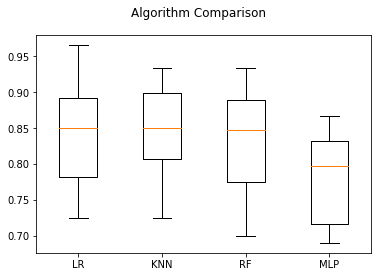

In [14]:
# Test drive some other models for performance comparison
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', class_weight='balanced', random_state=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=0)))
models.append(('MLP', MLPClassifier(solver='lbfgs', max_iter=200, random_state=0)))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=0)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare results
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
# Fit a KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)
print('KNN accuracy: %.3f' % metrics.accuracy_score(y_test, y_predicted))
print(metrics.confusion_matrix(y_test, y_predicted))

KNN accuracy: 0.813
[[35  4]
 [10 26]]


In [16]:
# Let's look at our data and select some rows to try our model on
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.000,male,typical_angina,145.000,233.000,1.000,left_ventricular_hypertrophy,150.000,0.000,2.300,downsloping,0.000,fixed_defect,0
1,67.000,male,asymptomatic,160.000,286.000,0.000,left_ventricular_hypertrophy,108.000,1.000,1.500,flat,3.000,thal_normal,1
2,67.000,male,asymptomatic,120.000,229.000,0.000,left_ventricular_hypertrophy,129.000,1.000,2.600,flat,2.000,reversible_defect,1
3,37.000,male,non_anginal_pain,130.000,250.000,0.000,ecg_normal,187.000,0.000,3.500,downsloping,0.000,thal_normal,0
4,41.000,female,atypical_angina,130.000,204.000,0.000,left_ventricular_hypertrophy,172.000,0.000,1.400,upsloping,0.000,thal_normal,0


In [17]:
# Let's use our model to predict the target for the first five rows
for i in range(0,5):
    print(knn.predict([X[i]]))

[0]
[1]
[1]
[0]
[0]


### Where do I go from here?
* [Try further tuning of the model using GridSearchCV](https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/)
* [Serialize the model to disk, then load again and use it to make predictions](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/)
* [Dive into a book with lots of practical tutorials](https://machinelearningmastery.com/machine-learning-with-python/)